# AI_Compete_TypeA
- AUTHOR: SungwookLE
- DATE: '21.6/29

- 문제:
1. 제공 데이터 활용, 최소 3개 이상의 알고리즘을 활용해 binary classification 문제를 해결하고,
2. input_test.csv 파일로 각각 만든 예측 모델의 출력을 output_test.csv로 저장한 뒤,
3. 성능 결과를 토대로 데이터셋의 특성을 분석하여 제출하시오

- **Overview**  
1. classification: KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier  
2. output_test 출력  
3. 데이터셋의 특성 분석  

In [1]:
from subprocess import check_output
import pandas as pd
import numpy as np

print(check_output(["ls","input"]).decode('utf8'))

input_test.csv
input_train.csv
output_test.csv
output_train.csv



## 1. Classification: KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
input_train = pd.read_csv('input/input_train.csv', header=None)
output_train = pd.read_csv('input/output_train.csv', header=None)
input_test = pd.read_csv('input/input_test.csv', header=None)
output_test = pd.read_csv('input/output_test.csv', header=None)

input_train.shape, input_test.shape

((10000, 5), (2000, 5))

In [4]:
stscaler = StandardScaler()
stscaler.fit(input_train)
input_train_ = stscaler.transform(input_train)
train_data = pd.DataFrame(input_train_)

input_test_ = stscaler.transform(input_test)
test_data = pd.DataFrame(input_test_)

In [5]:
# KNeighborsClassifier
clf1 = KNeighborsClassifier(n_neighbors=5)
clf1.fit(train_data, output_train)

socre = clf1.score(train_data, output_train)
print("KNeighborsClassifier Score is {:.3f}".format(socre))

KNeighborsClassifier Score is 0.928


In [6]:
# DecisionTreeClassifier
clf2 = DecisionTreeClassifier()
clf2.fit(train_data, output_train)
socre = clf2.score(train_data, output_train)
print("DecisionTreeClassifier Score is {:.3f}".format(socre))

DecisionTreeClassifier Score is 1.000


In [7]:
# RandomForestClassifier
clf3 = RandomForestClassifier(n_estimators=50)
clf3.fit(train_data, output_train)
socre = clf3.score(train_data, output_train)
print("RandomForestClassifier Score is {:.3f}".format(socre))

RandomForestClassifier Score is 1.000


## 2. Save Output_test.csv

In [8]:
pred1 = clf1.predict(test_data)
pred2 = clf2.predict(test_data)
pred3 = clf3.predict(test_data)

sub1 = pd.DataFrame(pred1)
sub2 = pd.DataFrame(pred2)
sub3 = pd.DataFrame(pred3)

sub1.to_csv('output_test1.csv', index=False, header=None)
sub2.to_csv('output_test2.csv', index=False, header=None)
sub3.to_csv('output_test3.csv', index=False, header=None)

## 3. DataSet Characteristic
- (train: input<->output 관계성) / (test: input<->output 관계성) 을 살펴보기 위해 PCA 로 데이터 차원을 줄여서 매핑하고, 이를 통해 특성 분석

PCA Eigen ratio is [0.32690763 0.2040973 ]
Sum of Eigen ratio is 0.5310049287682164


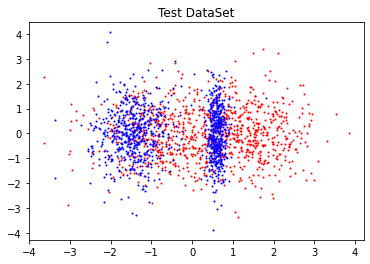

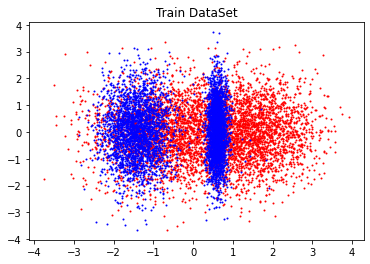

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

pca = PCA(n_components=2)
pca.fit(train_data)

print("PCA Eigen ratio is {}".format(pca.explained_variance_ratio_))
print("Sum of Eigen ratio is {}".format(np.sum(pca.explained_variance_ratio_)))

X=pca.transform(test_data)
X = pd.DataFrame(X, columns=['comp1','comp2'])
aug_0 = pd.concat([X, output_test],axis=1)
aug_0 = aug_0.rename(columns={0: 'label'})

colors=['red','blue']
labels=[0,1]
for label, color in zip(labels, colors):
    plt.scatter(x=aug_0.loc[aug_0['label']==label]['comp1'] , y=aug_0.loc[aug_0['label']==label]['comp2'], c=color, s=1)
    plt.title('Test DataSet')
plt.show()

X=pca.transform(train_data)
X = pd.DataFrame(X, columns=['comp1','comp2'])
aug_1 = pd.concat([X, output_train],axis=1)
aug_1 = aug_1.rename(columns={0: 'label'})

colors=['red','blue']
labels=[0,1]
for label, color in zip(labels, colors):
    plt.scatter(x=aug_1.loc[aug_1['label']==label]['comp1'] , y=aug_1.loc[aug_1['label']==label]['comp2'], c=color, s=1)
    plt.title('Train DataSet')
plt.show()

## 끝